In [1]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mticker
import matplotlib.dates as md
import datetime as dt
from scipy import stats
import math 

In [2]:
#Import data
df5 = pd.read_csv('AccelerometerData_103_04_06_19.txt')  
df6 = pd.read_csv('AccelerometerData_103_05_06_19.txt') 
df2 = pd.read_csv('AccelerometerData_101_31_05_19.txt')  
df4 = pd.read_csv('AccelerometerData_102_03_06_19.txt') 
df1 = pd.read_csv('AccelerometerData_101_30_05_19.txt') 
df3 = pd.read_csv('AccelerometerData_102_02_06_19.txt') 

In [3]:
# data seperation for each participant and create a list for all datasets
Participant1=[df1,df2]
Participant2=[df3,df4]
Participant3=[df5,df6]
Participants=[Participant1,Participant2,Participant3]
df=[df1,df2,df3,df4,df5,df6]

In [4]:
df[1].head()

,UTC_Time,UpTime,Value1,Value2,Value3
0,2:09:45 AM,387,-1.256232,5.151747,8.319844
1,2:09:45 AM,410,-1.263410,5.096712,8.338987
2,2:09:45 AM,432,-1.268196,5.056034,8.319844
3,2:09:45 AM,454,-1.296910,5.091927,8.291130
4,2:09:45 AM,475,-1.294517,5.209175,8.269595


In [5]:
df=df[1]

# Summary Statistics

In [6]:
print('Earliest date:',df.UTC_Time.min())
print('Latest date:',df.UTC_Time.max())
print('Min of ax:',df.Value1.min())
print('Min of ay:',df.Value2.min())
print('Min of az:',df.Value3.min())
print('Max of ax:',df.Value1.max())
print('Max of ay:',df.Value2.max())
print('Max of az:',df.Value3.max())

Earliest date: 2:09:45 AM
Latest date: 7:46:06 AM
Min of ax: -21.09991
Min of ay: -25.646273
Min of az: -12.062219
Max of ax: 23.521446
Max of ay: 22.217358
Max of az: 27.651459


In [7]:
print('Mean value of ax for all users:%i'%np.mean(df.Value1))
print('Mean value of ay for all users:%i'%np.mean(df.Value2))
print('Mean value of az for all users:%i'%np.mean(df.Value3))

Mean value of ax for all users:0
Mean value of ay for all users:-1
Mean value of az for all users:6


# Distribution Analysis of Values

In [ ]:
from distfit import distfit

In [ ]:
dist = distfit()
dist.fit_transform(df['Value1'] )
dist.plot(figsize=(10,5));

In [ ]:
dist = distfit()
dist.fit_transform(df['Value2'] )
dist.plot(figsize=(10,5));

In [ ]:
dist = distfit()
dist.fit_transform(df['Value3'] )
dist.plot(figsize=(10,5));

# Preprocessing

In [8]:
# Remove spikes 
df = df[(np.abs(stats.zscore(df.iloc[:,2:5])) < 3).all(axis=1)]

In [9]:
#Convert UpTime to timedelta(ms)
df['UpTime'] = pd.to_timedelta(df['UpTime'], 'ms')

C:\Users\user\AppData\Local\Temp\ipykernel_392\1504547310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UpTime'] = pd.to_timedelta(df['UpTime'], 'ms')


In [10]:
#Resample data in 20Hz
df=df.resample('50ms', on='UpTime').mean()
df = df.fillna(method = 'ffill')

In [11]:
# Rolling 5 sec medians value1,2,3
df['Value1']=df['Value1'].rolling(window=100,min_periods=1).median()
df['Value2']=df['Value2'].rolling(window=100,min_periods=1).median()
df['Value3']=df['Value3'].rolling(window=100,min_periods=1).median()

In [12]:
df.head()

,Value1,Value2,Value3
UpTime,,,
0 days 00:00:00.387000,-1.262613,5.101498,8.326225
0 days 00:00:00.437000,-1.279163,5.126024,8.303294
0 days 00:00:00.487000,-1.262613,5.150551,8.280363
0 days 00:00:00.537000,-1.253440,5.165506,8.267801
0 days 00:00:00.587000,-1.262613,5.170890,8.255239


# Calculate Angle

In [13]:
#Calculate angle
df['angle'] = np.arctan(df["Value3"] / np.sqrt( np.square(df["Value1"]) + np.square(df["Value2"]))) * 180 / np.pi

In [14]:
# Reset UpTime
df.reset_index(inplace=True)

In [15]:
df.head()

,UpTime,Value1,Value2,Value3,angle
0,0 days 00:00:00.387000,-1.262613,5.101498,8.326225,57.740324
1,0 days 00:00:00.437000,-1.279163,5.126024,8.303294,57.532232
2,0 days 00:00:00.487000,-1.262613,5.150551,8.280363,57.362989
3,0 days 00:00:00.537000,-1.253440,5.165506,8.267801,57.262844
4,0 days 00:00:00.587000,-1.262613,5.170890,8.255239,57.186909


# Van Hess, 2015

In [16]:
#create a new dataframe with essential collumns
SPT = df[['UpTime', 'angle']]

In [17]:
#Average angle per 5S
SPT=SPT.resample('5S', on='UpTime').mean()

In [18]:
#calculate angle differences
SPT['angle difference'] = SPT['angle'].diff().fillna(method = 'bfill')

In [19]:
SPT.head()

,angle,angle difference
UpTime,,
0 days 00:00:00.387000,57.167962,8.941413
0 days 00:00:05.387000,66.109375,8.941413
0 days 00:00:10.387000,72.626686,6.517310
0 days 00:00:15.387000,80.808780,8.182095
0 days 00:00:20.387000,80.404302,-0.404478


# Detect inactivity

In [20]:
#create 2 booltype columns for 5 and 10 minutes windows and detect arms changes
SPT['5MWindow'] = SPT['angle difference'].apply(lambda x: abs(x) < 5)
SPT['10MWindow'] = SPT['angle difference'].apply(lambda x: abs(x) < 5)

In [21]:
SPT.head()

,angle,angle difference,5MWindow,10MWindow
UpTime,,,,
0 days 00:00:00.387000,57.167962,8.941413,False,False
0 days 00:00:05.387000,66.109375,8.941413,False,False
0 days 00:00:10.387000,72.626686,6.517310,False,False
0 days 00:00:15.387000,80.808780,8.182095,False,False
0 days 00:00:20.387000,80.404302,-0.404478,True,True


In [22]:
#index arrays where angle change is bigger than 5 degrees    
index_5 = SPT['5MWindow'][SPT['5MWindow']==False].index
index_10 = SPT['10MWindow'][SPT['10MWindow']==False].index

In [23]:
#Detect if someone sleeping or not  (True if time is bigger than 5 or 10 minutes)
for i in range(index_5.shape[0] - 1):
    if (index_5[i+1] - index_5[i] > dt.timedelta(seconds = 300)):
            SPT['5MWindow'].loc[index_5[i]+dt.timedelta(seconds = 5):index_5[i+1]-dt.timedelta(seconds = 5)] = True
    else:
            SPT['5MWindow'].loc[index_5[i]+dt.timedelta(seconds = 5):index_5[i+1]-dt.timedelta(seconds = 5)] = False
            

for i in range(index_10.shape[0] - 1):
    if (index_10[i+1] - index_10[i] > dt.timedelta(seconds = 600)):
            SPT['10MWindow'].loc[index_10[i]+dt.timedelta(seconds = 5):index_10[i+1]-dt.timedelta(seconds = 5)] = True
    else:
            SPT['10MWindow'].loc[index_10[i]+dt.timedelta(seconds = 5):index_10[i+1]-dt.timedelta(seconds = 5)] = False

C:\Users\user\AppData\Local\Temp\ipykernel_392\2729079712.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPT['5MWindow'].loc[index_5[i]+dt.timedelta(seconds = 5):index_5[i+1]-dt.timedelta(seconds = 5)] = False
C:\Users\user\AppData\Local\Temp\ipykernel_392\2729079712.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPT['5MWindow'].loc[index_5[i]+dt.timedelta(seconds = 5):index_5[i+1]-dt.timedelta(seconds = 5)] = True
C:\Users\user\AppData\Local\Temp\ipykernel_392\2729079712.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

In [24]:
#Set upTime as an index
SPT.reset_index(inplace=True)

In [25]:
#Replace T/F with values helps in diagrams
SPT['5MWindow']  = SPT['5MWindow'].apply(lambda x: 120 if x == 1 else  np.NaN)
SPT['10MWindow']  = SPT['10MWindow'].apply(lambda x: 140 if x == 1 else np.NaN)

In [26]:
SPT.head(10)

,UpTime,angle,angle difference,5MWindow,10MWindow
0,0 days 00:00:00.387000,57.167962,8.941413,NaN,NaN
1,0 days 00:00:05.387000,66.109375,8.941413,NaN,NaN
2,0 days 00:00:10.387000,72.626686,6.517310,NaN,NaN
3,0 days 00:00:15.387000,80.808780,8.182095,NaN,NaN
4,0 days 00:00:20.387000,80.404302,-0.404478,NaN,NaN
5,0 days 00:00:25.387000,73.924391,-6.479911,NaN,NaN
6,0 days 00:00:30.387000,74.867501,0.943110,NaN,NaN
7,0 days 00:00:35.387000,40.625100,-34.242401,NaN,NaN
8,0 days 00:00:40.387000,72.965783,32.340683,NaN,NaN
9,0 days 00:00:45.387000,80.952701,7.986918,NaN,NaN


# Import GroundTruth

In [27]:
# sleep log diary as groundtrouth
ground_truth = pd.read_excel('SleepLog.xlsx')
ground_truth = ground_truth.transpose()
gt = pd.DataFrame(ground_truth.iloc[1:,:].reset_index(drop=True))
gt

,0,1,2,3,4,5
0,02:20:00,02:09:00,02:19:00,00:24:00,01:09:00,03:08:00
1,02:35:00,02:24:00,02:35:00,00:46:00,01:24:00,03:23:00
2,07:40:00,07:31:00,04:52:00,04:19:00,09:10:00,09:03:00
3,07:55:00,07:46:00,05:08:00,04:36:00,09:24:00,09:18:00


# Correct time

In [28]:
#Τime correction in appropriate form
ct=gt[1][0]
date=dt.date(2019,5,30)
ct=dt.datetime.combine(date , ct)
SPT['UpTime']= ((SPT['UpTime']) + (ct))
SPT['UpTime']= SPT['UpTime'].dt.strftime('%H:%M:%S')

In [29]:
# Create a new collumn as ground_trouth
t1=gt[1][1]
t2= gt[1][2]
SPT.loc[(SPT['UpTime'] > str(t1)) & (SPT['UpTime'] < str(t2)) , 'gt']= 100

In [30]:
SPT.tail()

,UpTime,angle,angle difference,5MWindow,10MWindow,gt
4032,07:45:00,77.330286,0.515379,120.0,NaN,NaN
4033,07:45:05,78.199940,0.869654,120.0,NaN,NaN
4034,07:45:10,78.542758,0.342818,120.0,NaN,NaN
4035,07:45:15,71.657032,-6.885725,NaN,NaN,NaN
4036,07:45:20,72.431089,0.774056,120.0,140.0,NaN


In [31]:
SPT.head()

,UpTime,angle,angle difference,5MWindow,10MWindow,gt
0,02:09:00,57.167962,8.941413,NaN,NaN,NaN
1,02:09:05,66.109375,8.941413,NaN,NaN,NaN
2,02:09:10,72.626686,6.517310,NaN,NaN,NaN
3,02:09:15,80.808780,8.182095,NaN,NaN,NaN
4,02:09:20,80.404302,-0.404478,NaN,NaN,NaN


# Diagrams of arm angle during sleeping period

In [32]:
#Set UpTime as an index
SPT = SPT.set_index('UpTime')

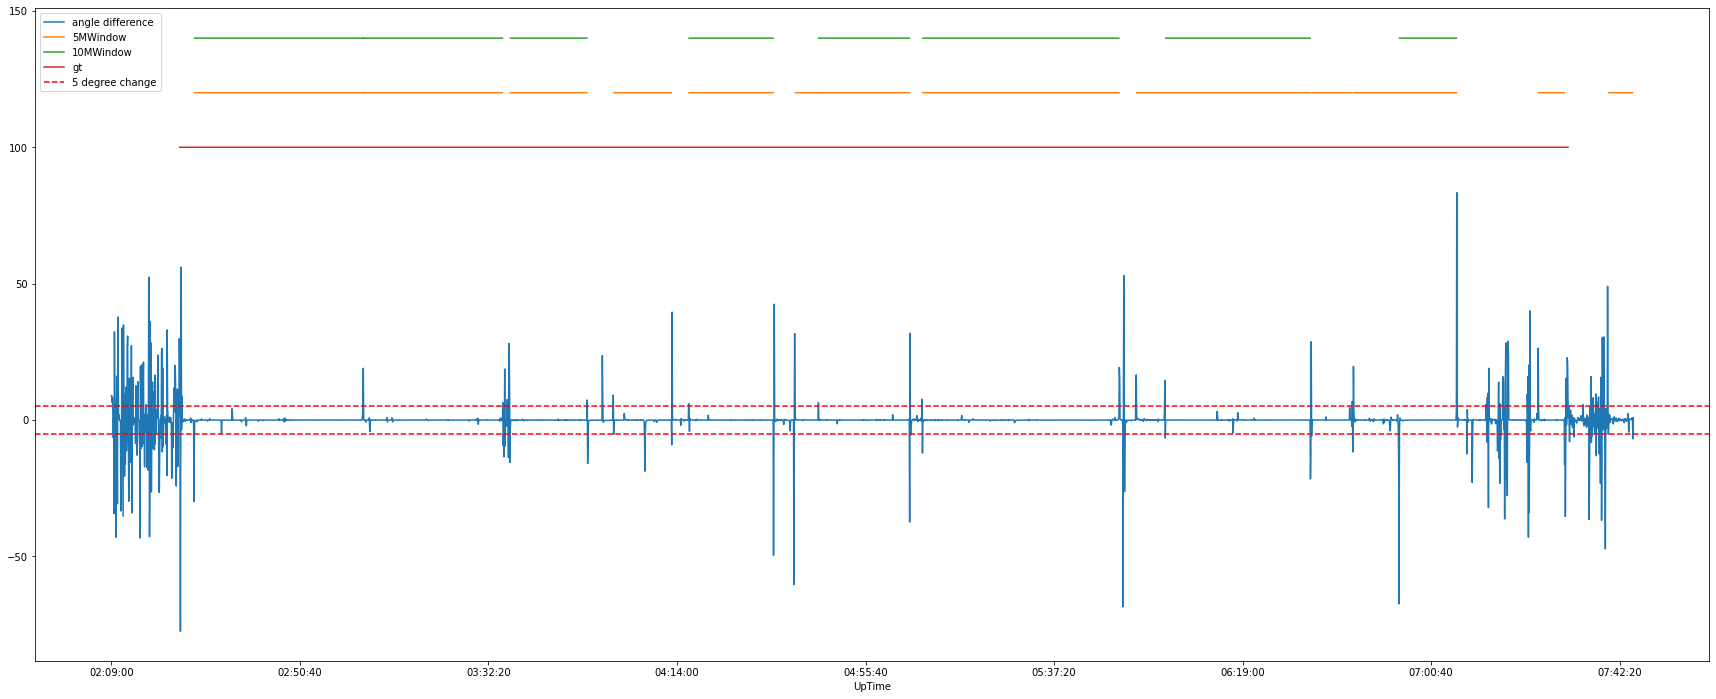

In [35]:
#diagram1-UpTimevsangle difference
ax = SPT.drop(['angle'], axis = 1).plot(figsize = (30,12))
ax.axhline(5, linestyle='--', color='r', label='5 degree change')
ax.axhline(-5, linestyle='--', color='r')
ax.legend()

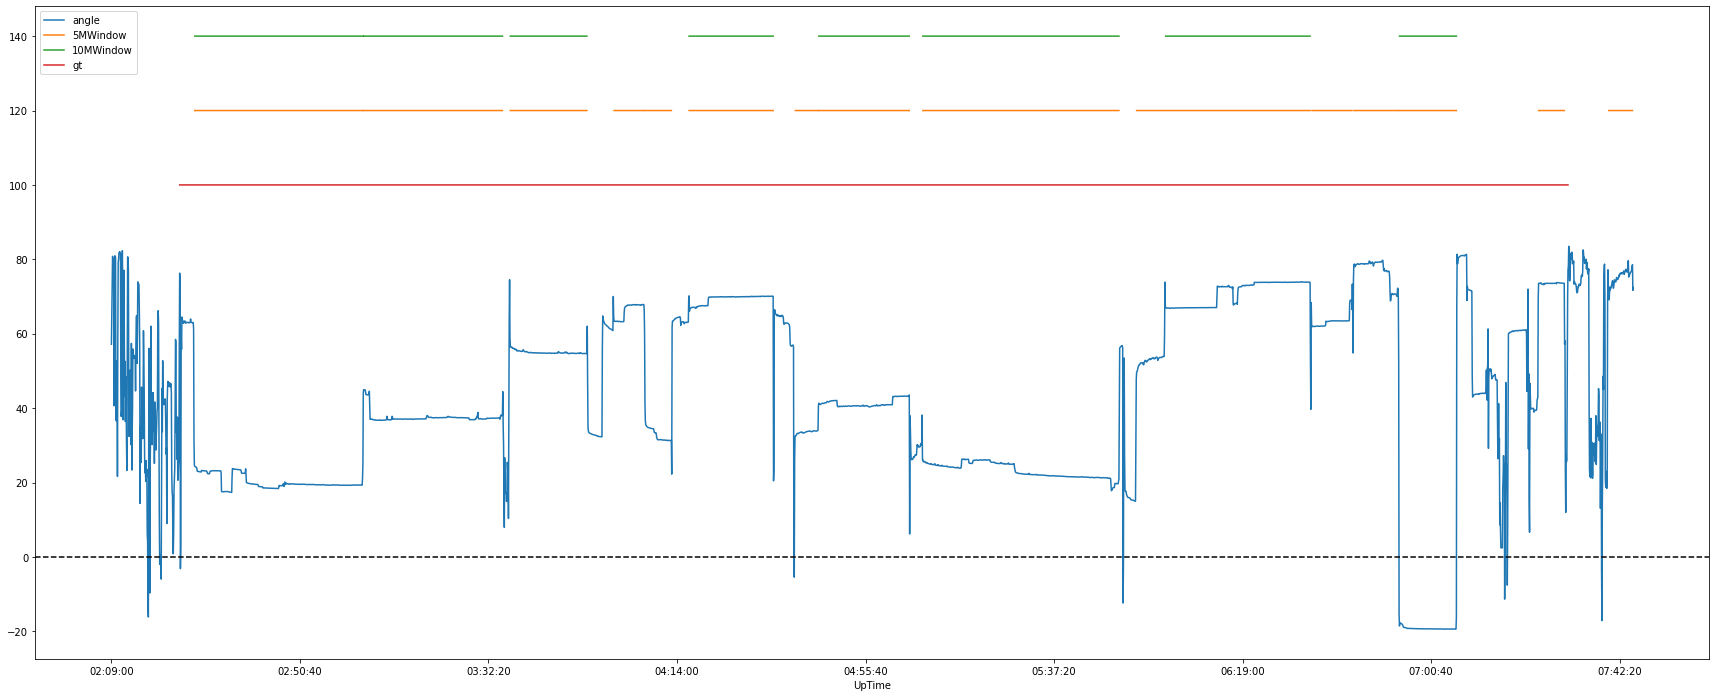

In [36]:
#diagram2-UpTimevsangle
ax = SPT.drop(['angle difference'], axis = 1).plot(figsize = (30,12))
ax.axhline(0, linestyle='--', color='black')
ax.legend()

# Results

In [37]:
#SPT.reset_index(inplace=True)

In [38]:
results_5 = SPT['5MWindow'].fillna(0)[SPT['5MWindow'].fillna(0).diff() != 0.0].astype(bool)
results_10 = SPT['10MWindow'].fillna(0)[SPT['10MWindow'].fillna(0).diff() != 0.0].astype(bool)
results_gt = SPT['gt'].fillna(0)[SPT['gt'].fillna(0).diff() != 0.0].astype(bool)


In [39]:
#create lists with sleep intervals
result5_list = []
for i in range(results_5.shape[0] - 1):
    result5_list.append(["{} - {}".format(str(results_5.index[i]), str(results_5.index[i+1])), results_5[i]])

    result10_list = []
for i in range(results_10.shape[0] - 1):
    result10_list.append(["{} - {}".format(str(results_10.index[i]), str(results_10.index[i+1])), results_10[i]])

    resultgt_list = []
for i in range(results_gt.shape[0] - 1):
        resultgt_list.append(["{} - {}".format(str(results_gt.index[i]), str(results_gt.index[i+1])), results_gt[i]])

In [40]:
#create dataframes with lists
results5_df  = pd.DataFrame(result5_list)
results10_df  = pd.DataFrame(result10_list)
resultsgt_df  = pd.DataFrame(resultgt_list)

In [41]:
#Create dataframes with 2 collums
results5_df.columns = ['Time', 'Sleep']
results10_df.columns = ['Time', 'Sleep']
resultsgt_df.columns = ['Time', 'Sleep']

In [42]:
#Sleeping or not?
results5_df  = results5_df[results5_df['Sleep'] == True]['Time']
results10_df  = results10_df[results10_df['Sleep'] == True]['Time']
resultsgt_df  = resultsgt_df[resultsgt_df['Sleep'] == True]['Time']

In [43]:
#Combine all results in one dataframe
SPT_results = pd.concat([results5_df,results10_df, resultsgt_df], ignore_index=True, axis=1)
SPT_results.columns = ['5 minutes window', '10 minutes window', 'ground truth']
SPT_results = SPT_results.fillna('-').reset_index(drop= True)
SPT_results.index.name = 'Time Intervals'

In [44]:
SPT_results

,5 minutes window,10 minutes window,ground truth
Time Intervals,,,
0,02:27:25 - 03:04:40,02:27:25 - 03:04:40,02:24:05 - 07:31:00
1,03:04:45 - 03:35:30,03:04:45 - 03:35:30,-
2,03:37:10 - 03:54:10,03:37:10 - 03:54:10,-
3,04:00:05 - 04:06:50,04:16:40 - 04:35:20,-
4,04:07:00 - 04:12:50,04:45:20 - 05:05:25,-
5,04:16:40 - 04:35:20,05:08:20 - 05:51:45,-
6,04:40:10 - 04:45:15,06:02:00 - 06:34:00,-
7,04:45:20 - 05:05:25,06:53:40 - 07:06:20,-
8,05:08:20 - 05:51:45,-,-


# Metric Score (M)

In [ ]:
#Metric based on distance
SPT['5MWindow']=SPT['5MWindow'].fillna(0)
SPT['10MWindow']=SPT['10MWindow'].fillna(0)
SPT['gt'] = SPT['gt'].fillna(0)
dist5= (SPT['5MWindow'] - SPT['gt']).abs()
dist10= (SPT['10MWindow'] - SPT['gt']).abs()

In [ ]:
#true values=(20,0)
#false values=(120,100)
dist5.value_counts()

In [ ]:
#true values=(20,0)
#false values=(120,100)
dist10.value_counts()

In [ ]:
#Count the false values
False_values5=(dist5.values==100).sum() + (dist5.values==120).sum()
False_values10=(dist10.values==140).sum() + (dist10.values==100).sum()

In [ ]:
#Calculate errors (false_values/5S divided by all values/5S)
M5=(False_values5/SPT.shape[0])*100
M10=(False_values10/SPT.shape[0])*100
print(M5,M10)